<a href="https://colab.research.google.com/github/21pravi/IMDb-Movie-Review-Public-Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA COLLECTION


###Importing Libraries


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
df = pd.read_csv('/content/data (1).csv')
print(df.head(30))

    Rating                                             Review
0       10  I'll admit I raised an eyebrow when I saw that...
1        9                                                NaN
2        7                                                NaN
3        9                                                NaN
4        9  The Riddler(Paul Dano, spot-on. How did it tak...
5        7                                                NaN
6        8  THE BATMAN (2022) *** Robert Pattinson, Zoe Kr...
7        7  Greetings again from the darkness. Riddle me t...
8        8  Always been a "Batman" fan as the D. C. legend...
9        8  Thank goodness this was good. I made my top te...
10       6  The headline can be taken two ways. If you rem...
11       7  The Batman creates a grim & gloomy atmosphere,...
12       9  I liked the movie. There were some ridiculous ...
13       8  Greetings from Lithuania.\n\n"The Batman" (202...
14       7  "The Batman" is an Action - Drama movie in whi...
15      

Labelling Sentiment based on ratings

In [ ]:
conditions = [(df['Rating'] > 5), (df['Rating'] <= 5)]
values = [1, 0]
df['Sentiment'] = np.select(conditions, values)
print("df:",df)


df:        Rating                                             Review  Sentiment
0          10  I'll admit I raised an eyebrow when I saw that...          1
1           9                                                NaN          1
2           7                                                NaN          1
3           9                                                NaN          1
4           9  The Riddler(Paul Dano, spot-on. How did it tak...          1
...       ...                                                ...        ...
54560       1  Slow, pointless and not worth watching. Just t...          0
54561       1  I really like going to the cinema and watching...          0
54562       4  I seriously dont know how Keanu Reeves starts ...          0
54563       7  Siberia is film making at it's best. I was qui...          1
54564       1  This movie is really painful to watch. I strug...          0

[54565 rows x 3 columns]


DATA CLEANING - Dropping rating column

In [ ]:
df.drop(columns='Rating', axis=1, inplace=True)
df

,Review,Sentiment
0,I'll admit I raised an eyebrow when I saw that...,1
1,NaN,1
2,NaN,1
3,NaN,1
4,"The Riddler(Paul Dano, spot-on. How did it tak...",1
...,...,...
54560,"Slow, pointless and not worth watching. Just t...",0
54561,I really like going to the cinema and watching...,0
54562,I seriously dont know how Keanu Reeves starts ...,0
54563,Siberia is film making at it's best. I was qui...,1


Checking NaN values

In [ ]:
df.isnull().values.any()

True

Total sum

In [ ]:
df.isnull().sum().sum()


11373

Visualizing using heatmap

<Axes: >

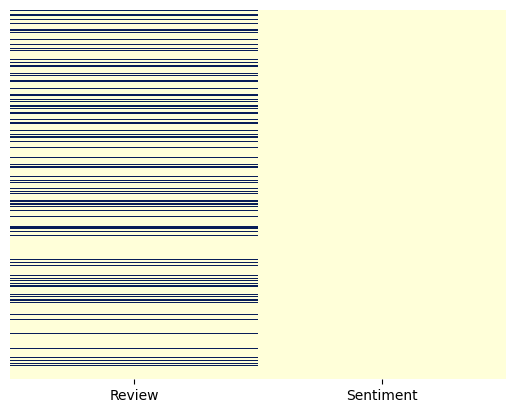

In [ ]:

sns.heatmap(df.isnull(),yticklabels = False, cbar = False, cmap="YlGnBu")


Dropping Null values in Review


In [ ]:
df = df.dropna()
#now checking if null values present or not
df.isnull().values.any()

False

after droping null - resenting the indexes:

In [ ]:
df= df.reset_index(drop=True)
print(df.head(7))

                                              Review  Sentiment
0  I'll admit I raised an eyebrow when I saw that...          1
1  The Riddler(Paul Dano, spot-on. How did it tak...          1
2  THE BATMAN (2022) *** Robert Pattinson, Zoe Kr...          1
3  Greetings again from the darkness. Riddle me t...          1
4  Always been a "Batman" fan as the D. C. legend...          1
5  Thank goodness this was good. I made my top te...          1
6  The headline can be taken two ways. If you rem...          1


In [ ]:
def clean_text1(text):
  text = text.lower()
  text = re.sub('\[.*?\]','',text)
  text = re.sub('[%s]'%re.escape(string.punctuation),'',text)
  text = re.sub('\w*\d\w*','',text)
  return text

cleaned1 = lambda x:clean_text1(x)
df['Review']=pd.DataFrame(df.Review.apply(cleaned1))

Removing Blank Space and Inverted commas

In [ ]:
#second round of cleaning
def clean_text2(text):
  text = re.sub('[''"",,,]', '',text)
  text = re.sub('\n', '',text)
  return text

cleaned2 = lambda x:clean_text2(x)
df['Review']=pd.DataFrame(df.Review.apply(cleaned2))



import nltk for Text Processing

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df

,Review,Sentiment
0,ill admit raised eyebrow saw pattinson cast ea...,1
1,riddlerpaul dano spoton take long get role lik...,1
2,batman robert pattinson zoe kravitz jeffrey wr...,1
3,greetings darkness riddle bat cat rat sound li...,1
4,always batman fan c legend favorite superhero ...,1
...,...,...
43187,slow pointless worth watching terrible found h...,0
43188,really like going cinema watching movies far r...,0
43189,seriously dont know keanu reeves starts this😑 ...,0
43190,siberia film making best quite surprised see f...,1


Handling Emojis and Emoticons

In [ ]:
!pip install emot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 823.9 kB/s eta 0:00:00


In [ ]:
import re
def remove_emoji(string):
    emoji_pattern= re.compile("["
                          u"\U0001F600-\U0001F64F" # emoticons
                          u"\U0001F300-\U0001F5FF" # symbols & pictographs
                          u"\U0001F680-\U0001F6FF" # transport & map symbols
                          u"\U0001F1E0-\U0001F1FF" # flags (ios)
                          u"\U00002702-\U00002780"
                          u"\U000024C2-\U0001F251"
                          "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

cleaned3=lambda x:remove_emoji(x)


In [ ]:
df['Review']=pd.DataFrame(df.Review.apply(cleaned3))


Common Word Removal

In [ ]:
#Checking the first 10 most frequent words
from collections import Counter
cnt = Counter()
for text in df["Review"].values:
    for word in text:
        cnt[word] += 1

cnt.most_common(10)

[(' ', 4449090),
 ('e', 3518978),
 ('i', 2105786),
 ('a', 1966638),
 ('t', 1951884),
 ('n', 1887621),
 ('s', 1845464),
 ('o', 1809706),
 ('r', 1784807),
 ('l', 1631931)]

In [ ]:
#Removing the frequent words
freq = set ([w for (w, wc) in cnt.most_common(10)])
#function to remove the frequent words
def freqwords (text):
    return " ".join([word for word in str(text).split() if word not in freq])
#Passing the function freqwords
df["Review"] = df["Review"].apply(freqwords)
print('dataset after removing frequent words',df)

dataset after removing frequent words                                                   Review  Sentiment
0      ill admit raised eyebrow saw pattinson cast ea...          1
1      riddlerpaul dano spoton take long get role lik...          1
2      batman robert pattinson zoe kravitz jeffrey wr...          1
3      greetings darkness riddle bat cat rat sound li...          1
4      always batman fan c legend favorite superhero ...          1
...                                                  ...        ...
43187  slow pointless worth watching terrible found h...          0
43188  really like going cinema watching movies far r...          0
43189  seriously dont know keanu reeves starts this f...          0
43190  siberia film making best quite surprised see f...          1
43191  movie really painful watch struggled get end e...          0

[43192 rows x 2 columns]


STEMMING AND LEMMATIZATION :-

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADJ }

def lemmatize_words(text):
  pos_tagged_text = nltk.pos_tag(text.split())
  return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

cleaned5=lambda x:lemmatize_words(x)


In [ ]:
df['Review']=pd.DataFrame(df.Review.apply(cleaned5))


In [ ]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()

def tokenizer_porter(text):
  token = []
  for word in text.split():
      token.append(porter.stem(word))
  return token

In [ ]:
df['review_len'] = df['Review'].astype(str).apply(len)
df['word_count'] = df['Review'].apply(lambda x: len(str(x).split()))
df.head()

,Review,Sentiment,review_len,word count,word_count
0,ill admit raise eyebrow saw pattinson cast eat...,1,373,55,55
1,riddlerpaul dano spoton take long get role lik...,1,1309,194,194
2,batman robert pattinson zoe kravitz jeffrey wr...,1,714,102,102
3,greeting darkness riddle bat cat rat sound lik...,1,3335,482,482
4,always batman fan c legend favorite superhero ...,1,1020,161,161
...,...,...,...,...,...
43187,slow pointless worth watch terrible find helpf...,0,82,11,11
43188,really like go cinema watch movie far regret t...,0,236,40,40
43189,seriously dont know keanu reeve start this fin...,0,89,13,13
43190,siberia film make best quite surprised see fil...,1,1597,244,244


WORD CLOUD

Wordcloud is a common and beautiful visualization for text data to plot the frequency of words.

Using this text block, we created the word cloud. Before making the word cloud we get rid of some more words that we thought not necessary.

In [ ]:
text = " ".join(review for review in df.Review)

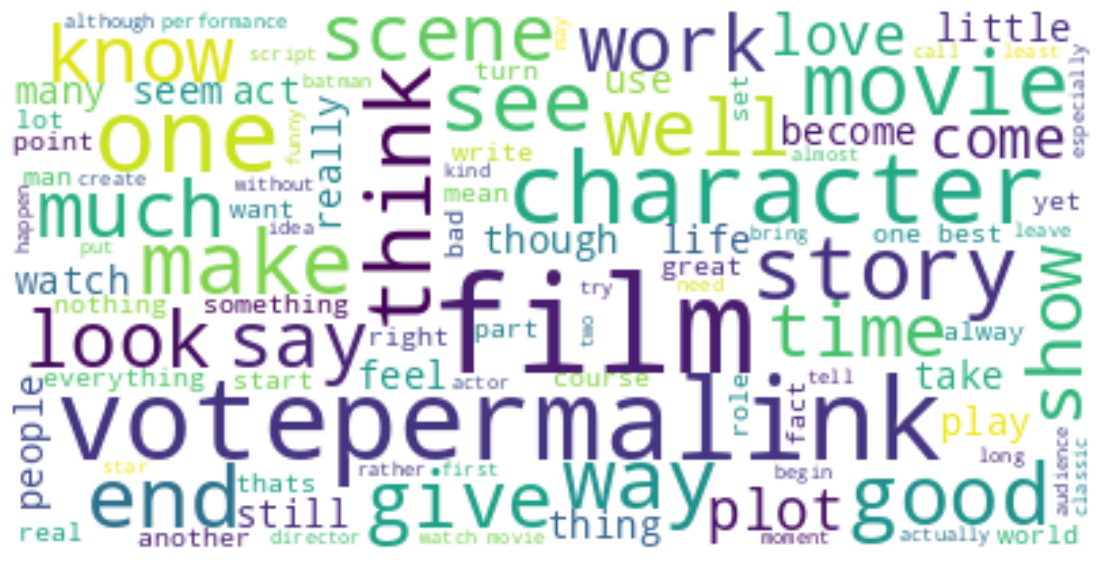

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
wordcl = WordCloud (stopwords = stopwords, background_color='white', max_font_size = 50, max_words = 5000).generate(text)
plt.figure(figsize=(14, 12))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()

# Frequency Chart

This is common practice in text data analysis to make charts of the frequency of words. That gives a good idea about what people are talking about most in this text. First, find the frequency of each word in the review column of the dataset. Then plot the top 20 words based on the frequency

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec=CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words [0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted (words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words (df['Review'], 20)
df1 = pd.DataFrame(common_words, columns= ['Review', 'count'])
df1.head()


,Review,count
0,movie,99243
1,film,79085
2,one,40995
3,make,35177
4,like,33712


 Top 20 BarPlot Frequency

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

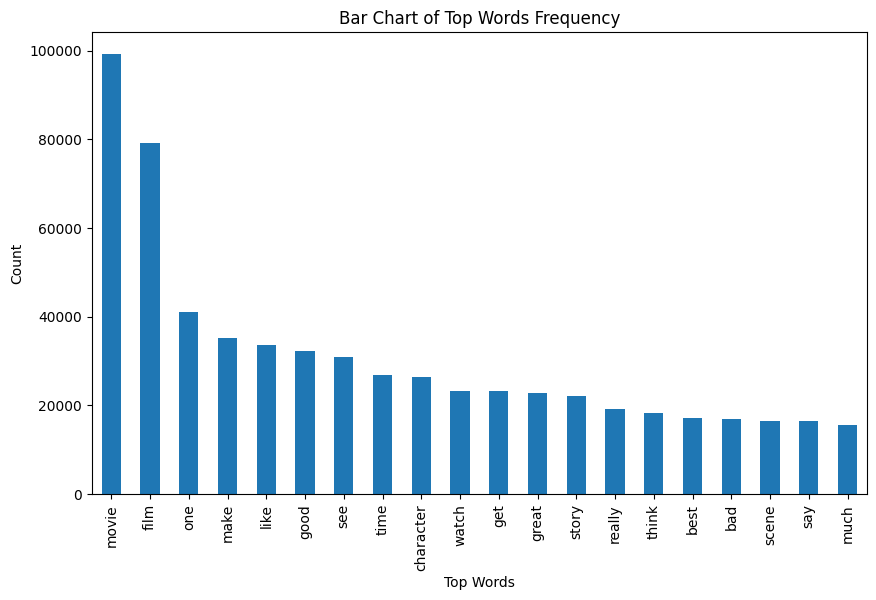

In [ ]:
df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
kind='bar',
figsize = (10, 6),
xlabel = "Top Words",
ylabel = "Count",
title = "Bar Chart of Top Words Frequency"
)

In [ ]:
 def get_top_n_bigram(corpus, n=None):
  vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted (words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]
common_words2 = get_top_n_bigram(df['Review'], 30)
df2 = pd.DataFrame(common_words2, columns=['Review', "Count"])
df2.head()

,Review,Count
0,one best,3439
1,watch movie,2658
2,dark knight,2408
3,see movie,2408
4,special effect,2354


This is the bar chart pf topmost occuring bigrams:

<Axes: title={'center': 'Bar chart of Bigrams\xa0Frequency'}, xlabel='Bigram Words', ylabel='Count'>

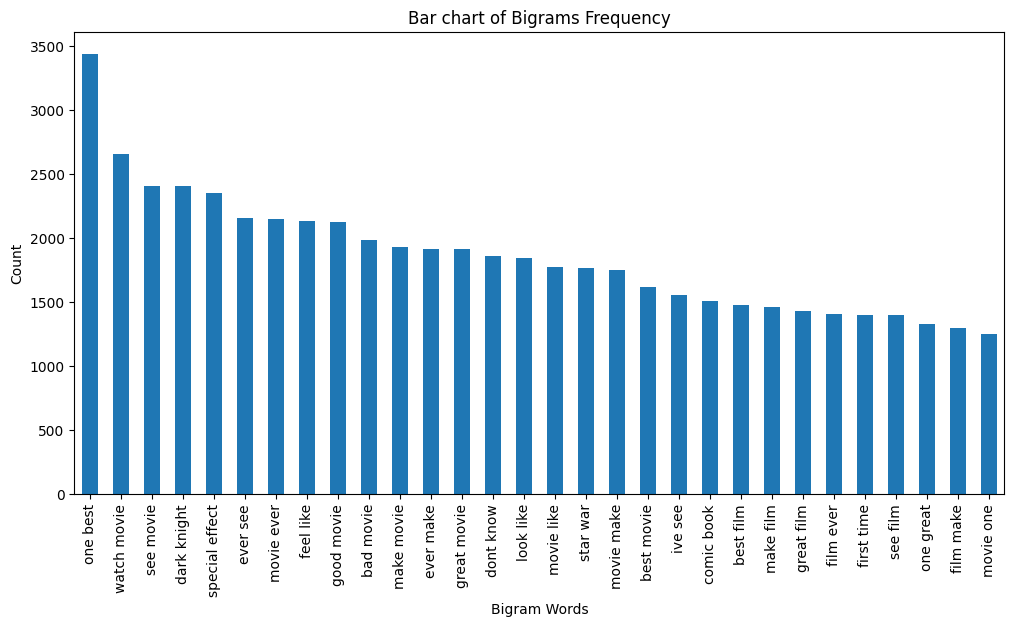

In [ ]:
df2.groupby('Review').sum() ['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Bigram Words",
    ylabel = "Count",
    title = "Bar chart of Bigrams Frequency"
)

Feature Selection and Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X = df ['Review']
y = df['Sentiment']

tfidf = TfidfVectorizer(tokenizer=tokenizer_porter)
X_tfidf = tfidf.fit_transform(X)

# split the dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state = 101)

<30234x116047 sparse matrix of type '<class 'numpy.float64'>'
	with 2332652 stored elements in Compressed Sparse Row format>

In [ ]:
X_train

<30234x116047 sparse matrix of type '<class 'numpy.float64'>'
	with 2332652 stored elements in Compressed Sparse Row format>

Classification

We have used Logistic Regression classifier to predict the movie polarity as positive or negative. Logistic regression capability to classify data using continuous and discrete measurements makes it a popular machine learning algorithm. Logistic regression uses something called maximum likelihood to fit data. It can be used to classify samples and can use different kinds of data to classify samples. It can also be used to assess what variables are useful for classifying samples

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train, y_train)


LogisticRegression()

Evaluating Performance

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

predictions = clf.predict(X_test)

print('The accuracy score is:', accuracy_score(y_test, predictions))
print('The confusion matrix is:', '\n', confusion_matrix(y_test, predictions))
clf_report = classification_report(y_test, predictions, output_dict=True)
print('The classification report is :', '\n',clf_report)

The accuracy score is: 0.8832381540361167
The confusion matrix is: 
 [[3360  995]
 [ 518 8085]]
The classification report is : 
 {'0': {'precision': 0.8664259927797834, 'recall': 0.7715269804822044, 'f1-score': 0.8162273776266245, 'support': 4355}, '1': {'precision': 0.8904185022026432, 'recall': 0.9397884458909682, 'f1-score': 0.9144375954306395, 'support': 8603}, 'accuracy': 0.8832381540361167, 'macro avg': {'precision': 0.8784222474912133, 'recall': 0.8556577131865863, 'f1-score': 0.865332486528632, 'support': 12958}, 'weighted avg': {'precision': 0.8823549601022762, 'recall': 0.8832381540361167, 'f1-score': 0.8814305342686943, 'support': 12958}}


Heatmap showning the Accuracy

<Axes: >

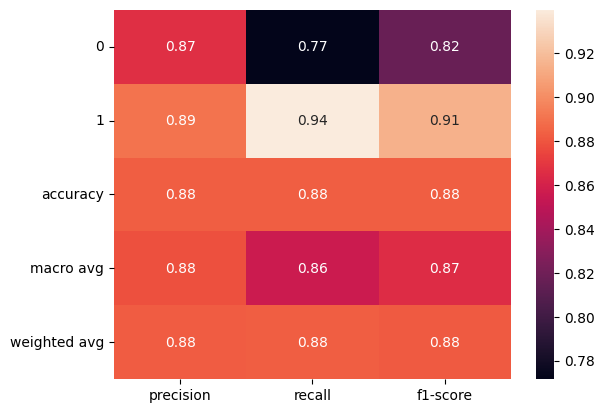

In [ ]:
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot = True)

###Random Forest

In [ ]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=5000, random_state=120)
rf_model.fit(x_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.8136224801466097
              precision    recall  f1-score   support

           0       0.87      0.52      0.65      5492
           1       0.80      0.96      0.87     10878

    accuracy                           0.81     16370
   macro avg       0.84      0.74      0.76     16370
weighted avg       0.82      0.81      0.80     16370



###ANN MODEL

In [ ]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=100, optimizer='adam', verbose=10, random_state=101)
ann.fit(X_train, y_train)
ann_predictions = ann.predict(X_test)

# Evaluate ANN model
print('ANN Accuracy:', accuracy_score(y_test, ann_predictions))
print('Confusion Matrix:\n', confusion_matrix(y_test, ann_predictions))
print('Classification Report:\n', classification_report(y_test, ann_predictions))


Iteration 1, loss = 0.40755581
Iteration 2, loss = 0.23810070
Iteration 3, loss = 0.20483419
Iteration 4, loss = 0.16235199
Iteration 5, loss = 0.09771343
Iteration 6, loss = 0.04276868
Iteration 7, loss = 0.01755521
Iteration 8, loss = 0.00807847
Iteration 9, loss = 0.00443539
Iteration 10, loss = 0.00279847
Iteration 11, loss = 0.00182387
Iteration 12, loss = 0.00205243
Iteration 13, loss = 0.00174928
Iteration 14, loss = 0.00171340
Iteration 15, loss = 0.00128237
Iteration 16, loss = 0.00163303
Iteration 17, loss = 0.00122717
Iteration 18, loss = 0.00168280
Iteration 19, loss = 0.00136647
Iteration 20, loss = 0.00159130
Iteration 21, loss = 0.00112543
Iteration 22, loss = 0.00128011
Iteration 23, loss = 0.00134141
Iteration 24, loss = 0.00108238
Iteration 25, loss = 0.00105175
Iteration 26, loss = 0.00099902
Iteration 27, loss = 0.00098625
Iteration 28, loss = 0.00086343
Iteration 29, loss = 0.00085787
Iteration 30, loss = 0.00081928
Iteration 31, loss = 0.00086352
Iteration 32, los

###DEFINING LSTM MODEL

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

# Tokenizing the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['Review'])
X_seq = tokenizer.texts_to_sequences(df['Review'])

# Padding sequences to have the same length
max_len = 100
X_pad = pad_sequences(X_seq, padding='post', maxlen=max_len)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.3, random_state=101)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


###LSTM MODEL

In [ ]:
from tensorflow.keras.layers import LSTM

# Define LSTM Model with more layers and dropout
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=max_len),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(2, activation='softmax')
])

lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train LSTM Model
lstm_history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate LSTM Model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test)
print('LSTM Accuracy:', lstm_accuracy)


Epoch 1/10
756/756 [==============================] - 237s 307ms/step - loss: 0.5712 - accuracy: 0.7370 - val_loss: 0.5748 - val_accuracy: 0.7333
Epoch 2/10
756/756 [==============================] - 221s 292ms/step - loss: 0.5699 - accuracy: 0.7406 - val_loss: 0.5932 - val_accuracy: 0.7051
Epoch 3/10
756/756 [==============================] - 221s 292ms/step - loss: 0.4244 - accuracy: 0.8033 - val_loss: 0.3216 - val_accuracy: 0.8660
Epoch 4/10
756/756 [==============================] - 244s 322ms/step - loss: 0.2980 - accuracy: 0.8807 - val_loss: 0.3019 - val_accuracy: 0.8728
Epoch 5/10
756/756 [==============================] - 322s 426ms/step - loss: 0.2703 - accuracy: 0.8949 - val_loss: 0.3127 - val_accuracy: 0.8718
Epoch 6/10
756/756 [==============================] - 230s 305ms/step - loss: 0.2262 - accuracy: 0.9135 - val_loss: 0.3317 - val_accuracy: 0.8720
Epoch 7/10
756/756 [==============================] - 288s 381ms/step - loss: 0.1933 - accuracy: 0.9301 - val_loss: 0.3383 -

###GCN

###Download Libraries


In [ ]:
!pip install torch

In [ ]:

# Install torch and torch_geometric with precompiled binaries
!pip install torch==2.0.1 torchvision torchaudio
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.0.0+cpu.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.0.0+cpu.html
!pip install torch-geometric
!pip install contractions
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 87.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

###Import Libraries




In [ ]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool
from torch_geometric.data import Data, DataLoader
from scipy.sparse import csr_matrix
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
import contractions
import unidecode

###Preprocessing

In [ ]:
# Download required NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

# Load your dataset
df = pd.read_csv('/content/data (1).csv')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
porter = PorterStemmer()

# Function to get wordnet pos tags
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def clean_text(text):
    if not isinstance(text, str):
        return ""
    # Lowercase
    text = text.lower()
    # Expand contractions
    text = contractions.fix(text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove emojis
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    # Remove accents
    text = unidecode.unidecode(text)
    # Remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize text
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    # Lemmatize words
    words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]
    # Stem words
    words = [porter.stem(word) for word in words]
    return ' '.join(words)



# Label sentiment based on ratings
conditions = [(df['Rating'] > 5), (df['Rating'] <= 5)]
values = [1, 0]
df['Sentiment'] = np.select(conditions, values)
df.drop(columns='Rating', axis=1, inplace=True)
df = df.dropna().reset_index(drop=True)

# Clean text in 'Review' column
df['Review'] = df['Review'].apply(clean_text)

vectorizer = TfidfVectorizer(max_features=10000)  # Increase the number of features
X = vectorizer.fit_transform(df['Review'])
y = df['Sentiment'].values

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Define GCN model

In [ ]:

def create_data_list(X, y):
    data_list = []
    for i in range(len(y)):
        coo = csr_matrix(X[i])  # Convert each sample to COO format
        x = torch.tensor(coo.todense(), dtype=torch.float)
        # Create a dummy edge index
        edge_index = torch.tensor([[], []], dtype=torch.long)
        y_val = torch.tensor([y[i]], dtype=torch.long)
        data = Data(x=x, edge_index=edge_index, y=y_val)
        data_list.append(data)
    return data_list

train_data_list = create_data_list(X_train, y_train)
test_data_list = create_data_list(X_test, y_test)
train_loader = DataLoader(train_data_list, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data_list, batch_size=32, shuffle=False)

class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.conv3 = GCNConv(hidden_dim, output_dim)
        self.dropout = torch.nn.Dropout(p=0.5)  # Add dropout layer

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.dropout(x)  # Apply dropout
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.dropout(x)  # Apply dropout
        x = self.conv3(x, edge_index)
        x = global_mean_pool(x, batch=data.batch)  # Apply global pooling
        return F.log_softmax(x, dim=1)

input_dim = X_train.shape[1]
hidden_dim = 64
output_dim = 2

model = GCN(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train_model(model, train_loader, optimizer, criterion, epochs=50):
    model.train()
    for epoch in range(epochs):
        for data in train_loader:
            optimizer.zero_grad()
            out = model(data)
            loss = criterion(out, data.y.view(-1))
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')

train_model(model, train_loader, optimizer, criterion)

def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for data in test_loader:
            out = model(data)
            preds = out.argmax(dim=1)
            all_preds.append(preds.cpu().numpy())
            all_labels.append(data.y.cpu().numpy())
    accuracy = accuracy_score(np.hstack(all_labels), np.hstack(all_preds))
    report = classification_report(np.hstack(all_labels), np.hstack(all_preds))
    return accuracy, report

accuracy, report = evaluate_model(model, test_loader)
print(f'Accuracy: {accuracy}')
print(report)

Epoch 1, Loss: 0.22235970199108124
Epoch 2, Loss: 0.4177505075931549
Epoch 3, Loss: 0.2945008873939514
Epoch 4, Loss: 0.25736334919929504
Epoch 5, Loss: 0.27005642652511597
Epoch 6, Loss: 0.14681190252304077
Epoch 7, Loss: 0.21827521920204163
Epoch 8, Loss: 0.08779484778642654
Epoch 9, Loss: 0.28703609108924866
Epoch 10, Loss: 0.3840291202068329
Epoch 11, Loss: 0.07597155123949051
Epoch 12, Loss: 0.48596659302711487
Epoch 13, Loss: 0.12055065482854843
Epoch 14, Loss: 0.0682307705283165
Epoch 15, Loss: 0.04220952093601227
Epoch 16, Loss: 0.2729138433933258
Epoch 17, Loss: 0.1804254651069641
Epoch 18, Loss: 0.1671527624130249
Epoch 19, Loss: 0.04313059151172638
Epoch 20, Loss: 0.10652051866054535
Epoch 21, Loss: 0.031125826761126518
Epoch 22, Loss: 0.4261343479156494
Epoch 23, Loss: 0.24443447589874268
Epoch 24, Loss: 0.02411186881363392
Epoch 25, Loss: 0.09256522357463837
Epoch 26, Loss: 0.30959194898605347
Epoch 27, Loss: 0.3835868537425995
Epoch 28, Loss: 0.09714861214160919
Epoch 29,

# **Comparison of Accuracy, Precision, F1-score and Recall of all models**

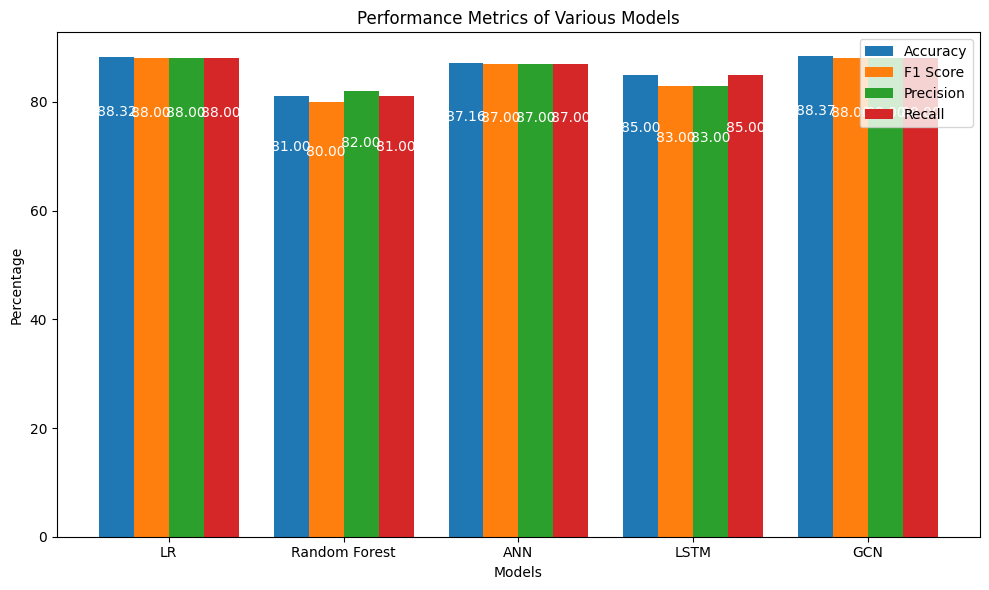

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['LR', 'Random Forest', 'ANN', 'LSTM', 'GCN']
accuracy = [88.32, 81, 87.16, 85, 88.37]
fscore = [88, 80, 87, 83, 88]
precision = [88, 82, 87, 83, 88]
recall = [88, 81, 87, 85, 88]

# X-axis positions for each model
x = np.arange(len(models))

# Bar width
width = 0.2

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting each metric
bars1 = ax.bar(x - 1.5 * width, accuracy, width, label='Accuracy')
bars2 = ax.bar(x - 0.5 * width, fscore, width, label='F1 Score')
bars3 = ax.bar(x + 0.5 * width, precision, width, label='Precision')
bars4 = ax.bar(x + 1.5 * width, recall, width, label='Recall')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Percentage')
ax.set_title('Performance Metrics of Various Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Function to add value labels inside the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X coordinate
            height - height * 0.1,  # Y coordinate slightly below the top
            f'{height:.2f}',  # Text label
            ha='center', va='top',  # Horizontal and vertical alignment
            color='white',  # Text color for contrast
            fontsize=10  # Font size
        )

# Add labels to each set of bars
add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)

# Display the plot
plt.tight_layout()
plt.show()